In [35]:
import tensorflow as tf
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%ls ../../../autodl/codalab_competition_bundle/AutoDL_starting_kit/

AutoDL_ingestion_program/      README.md
AutoDL_sample_code_submission/ metadata
AutoDL_sample_data/            run_local_test.py
AutoDL_scoring_program/


In [252]:
input_dir = '../../formatted_datasets/'
dataset_name = 'munster'
train_dir = os.path.join(input_dir, '{}/{}.data/train'.format(dataset_name, dataset_name))
test_dir = os.path.join(input_dir, '{}/{}.data/test'.format(dataset_name, dataset_name))
starting_kit_dir = '../../../autodl/codalab_competition_bundle/AutoDL_starting_kit/'
ingestion_dir = os.path.join(starting_kit_dir, 'AutoDL_ingestion_program/')

In [343]:
import sys
sys.path.append(ingestion_dir)
from dataset import AutoDLDataset

INFO:tensorflow:Number of training files: 1.


Text(0.5,1,'Label: 5')

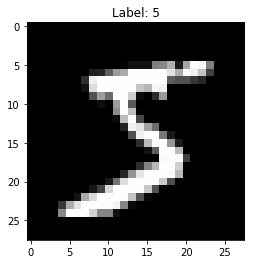

In [254]:
dataset_dir = train_dir
autodl_dataset = AutoDLDataset(dataset_dir)
dataset = autodl_dataset.get_dataset()
iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()
with tf.Session() as sess:
  features, labels = sess.run(next_element)
image = features.reshape(28,28)
label = np.argmax(labels)
plt.imshow(image, cmap='gray')
plt.title('Label: {}'.format(label))

INFO:tensorflow:Number of training files: 1.
Looking at example of index: 379


Text(0.5,1,'Label: 4')

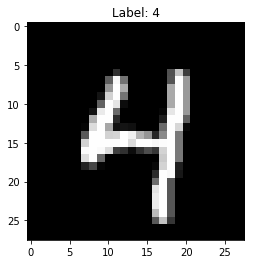

In [266]:
dataset_dir = test_dir
autodl_dataset = AutoDLDataset(dataset_dir, repeat=False)
dataset = autodl_dataset.get_dataset()
num_examples_test = autodl_dataset.get_metadata().size()
index = np.random.randint(0, num_examples_test)
index = np.random.randint(0, 1000)
print('Looking at example of index: {}'.format(index))
iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()
with tf.Session() as sess:
  for i in range(index + 1):
    features, _ = sess.run(next_element)
solution_dir = os.path.join(input_dir, 'munster/munster.solution')
labels = np.loadtxt(solution_dir)
image = features.reshape(28,28)
label = np.argmax(labels, axis=1)[index]
plt.imshow(image, cmap='gray')
plt.title('Label: {}'.format(label))

In [224]:
len(fine_labels)

50000

In [236]:
fine_labels[index]

29

INFO:tensorflow:Number of training files: 1.
Looking at example of index: 577
11 38
[11 58]


Text(0.5,1,'Label: large_omnivores_and_herbivores - kangaroo')

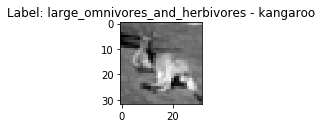

In [359]:
dataset_name = 'ciao'
train_dir = os.path.join(input_dir, '{}/{}.data/train'.format(dataset_name, dataset_name))
test_dir = os.path.join(input_dir, '{}/{}.data/test'.format(dataset_name, dataset_name))
dataset_dir = test_dir
data_dict = test_dict
coarse_labels = data_dict[b'coarse_labels']
fine_labels = data_dict[b'fine_labels']
autodl_dataset = AutoDLDataset(dataset_dir, repeat=False)
dataset = autodl_dataset.get_dataset()
num_examples_test = autodl_dataset.get_metadata().size()
# index = np.random.randint(0, num_examples_test)
index = np.random.randint(0, 1000)
# index = 0
print('Looking at example of index: {}'.format(index))
coarse_label = coarse_labels[index]
fine_label = fine_labels[index]
coarse_label_name = coarse_label_names[coarse_label]
fine_label_name = fine_label_names[fine_label]
iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()
with tf.Session() as sess:
  for i in range(index + 1):
    features, _ = sess.run(next_element)
image = features.reshape(32,32)
solution_dir = os.path.join(input_dir, '{}/{}.solution'.format(dataset_name, dataset_name))
labels = np.loadtxt(solution_dir)
label = np.where(labels[index] > 0)[0]
print(coarse_label, fine_label)
print(label)
plt.figure(figsize=(1.5,1.5))
plt.imshow(image, cmap='gray')
plt.title('Label: {} - {}'.format(coarse_label_name, fine_label_name))

In [81]:
haha = {'yo':1, 'juhua':2}

In [83]:
str(haha)

"{'yo': 1, 'juhua': 2}"

In [92]:
from tensorflow.contrib.learn.python.learn.datasets import mnist

In [93]:
datasets = mnist.read_data_sets(train_dir='/tmp/data/', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [94]:
datasets = mnist.read_data_sets(train_dir='/tmp/data/', validation_size=0)
print("Training data size:", datasets.train.images.shape)
print("Validation data size:", datasets.validation.images.shape)
print("Test data size:", datasets.test.images.shape)

tf.gfile.MkDir("mnist/")

input_sequence = datasets.train.images
output_sequence = datasets.train.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Training data size: (60000, 784)
Validation data size: (0, 784)
Test data size: (10000, 784)


In [97]:
input_sequence.shape

(60000, 784)

In [99]:
output_sequence

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [100]:
haha = zip(input_sequence, output_sequence)

In [101]:
for x in haha:
  print(x)
  break

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.    

In [103]:
haha = input_sequence[0]

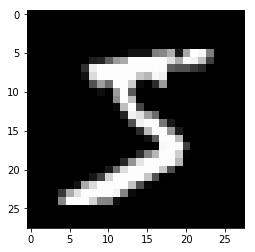

In [106]:
plt.imshow(haha.reshape(28, 28), cmap='gray')

In [108]:
haha = list(input_sequence)

In [110]:
def get_features_labels_pairs_generator(subset='train'):
  """Get generator of (features, labels) pairs to be used for
  dataset_formatter.UniMediaDatasetFormatter.
  """
  datasets = mnist.read_data_sets(train_dir='/tmp/data/', validation_size=0)
  if subset == 'train':
    features = datasets.train.images
    labels = datasets.train.labels
  else:
    features = datasets.test.images
    labels = datasets.test.labels
  print("features.shape: ", features.shape)
  labels = [[x] for x in labels] # each item in labels should be a list
  return lambda: zip(features, labels)

In [111]:
features_labels_pairs_train =\
      get_features_labels_pairs_generator(subset='train')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
features.shape:  (60000, 784)


In [132]:
haha = features_labels_pairs_train()

In [127]:
for x in haha:
  print(type(x[0]))
  break

<class 'numpy.ndarray'>


In [128]:
for haha in x[0]:
  print(haha)
  break

0.0


zip

In [134]:
haha = (x for x in features_labels_pairs_train())

In [135]:
type(haha)

generator

In [137]:
classes = ['zero', 'one', 'two', 'three', 'four',
             'five', 'six', 'seven', 'eight', 'nine']

In [139]:
label_to_index_map_dict = {s:i for i, s in enumerate(classes)}

zero
one
two
three
four
five
six
seven
eight
nine


In [152]:
def dict_to_text_format(python_dict, map_name='label_to_index_map'):
  template = """<label_to_index_map> {
  key: <key>
  value: <value>
}
"""
  template = template.replace('<label_to_index_map>', map_name)
  text_format = ''
  for k, v in python_dict.items():
    item = template.replace('<key>', "'" + str(k) + "'")
    item = item.replace('<value>', str(v))
    text_format += item
  return text_format

In [153]:
print(dict_to_text_format(label_to_index_map_dict))

label_to_index_map {
  key: 'zero'
  value: 0
}
label_to_index_map {
  key: 'one'
  value: 1
}
label_to_index_map {
  key: 'two'
  value: 2
}
label_to_index_map {
  key: 'three'
  value: 3
}
label_to_index_map {
  key: 'four'
  value: 4
}
label_to_index_map {
  key: 'five'
  value: 5
}
label_to_index_map {
  key: 'six'
  value: 6
}
label_to_index_map {
  key: 'seven'
  value: 7
}
label_to_index_map {
  key: 'eight'
  value: 8
}
label_to_index_map {
  key: 'nine'
  value: 9
}



In [147]:
print(template)

<label_to_index_map> {
  key: <key>
  value: <value>
}



# CIFAR-100

In [161]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [169]:
# Be sure to store CIFAR data in these locations
root_dir = "../../raw_datasets/image/cifar-100-python/"
metadata_file = root_dir + 'meta'
train_file = root_dir + 'train'
test_file = root_dir + 'test'
metadata_dict = unpickle(metadata_file)
train_dict = unpickle(train_file)
test_dict = unpickle(test_file)

In [171]:
print(metadata_dict.keys())
print(train_dict.keys())
print(test_dict.keys())

dict_keys([b'fine_label_names', b'coarse_label_names'])
dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])


In [173]:
train_dict[b'data'].shape

(50000, 3072)

In [195]:
test_dict[b'batch_label']

bytes

In [198]:
data_dict = train_dict
images = data_dict[b'data']
num_examples = images.shape[0]
haha = images.reshape(num_examples, 3, 32, 32).transpose([0, 2, 3, 1])

VECT = [0.299, 0.587, 0.114]
res = haha.dot(VECT) # Convert to gray scale
res = res.reshape(num_examples, 32*32)

In [209]:
coarse_labels = data_dict[b'coarse_labels']
translation = len(coarse_label_names) # 20
fine_labels = [x + translation for x in data_dict[b'fine_labels']]

In [214]:
len(coarse_labels)

50000

In [212]:
np.array(fine_labels).min()

20

In [200]:
res.shape

(50000, 1024)

In [197]:
images.reshape(:, 3, 32, 32).transpose([0, 2, 3, 1])

SyntaxError: invalid syntax (<ipython-input-197-d8b18f67dbac>, line 1)

In [215]:
labels = zip(coarse_labels, fine_labels)

In [217]:
for x in labels:
  print(x)
  break

(11, 39)


In [184]:
np.dot(VECT, axis=1)

TypeError: 'axis' is an invalid keyword argument for this function

In [233]:
fine_label_names = metadata_dict[b'fine_label_names']
fine_label_names = [x.decode('utf-8') for x in fine_label_names]

In [234]:
coarse_label_names = metadata_dict[b'coarse_label_names']
coarse_label_names = [x.decode('utf-8') for x in coarse_label_names]

In [192]:
len(coarse_label_names)

20

In [ ]:
dataset_name = 'ciao'
# train_dir = os.path.join(input_dir, '{}/{}.data/train'.format(dataset_name, dataset_name))
test_dir = os.path.join(input_dir, '{}/{}.data/test'.format(dataset_name, dataset_name))
dataset_dir = test_dir
autodl_dataset = AutoDLDataset(dataset_dir, repeat=False)
dataset = autodl_dataset.get_dataset()

In [ ]:
path_to_tfrecord = os.path.join(input_dir, '{}/{}.data/train/sample-{}-train.tfrecord'.format(dataset_name, dataset_name))

## Verification on TFRecords

In [336]:
# Copyright 2016 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS-IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""AutoDL datasets.

Reads data in the Tensorflow AutoDL standard format.
"""
import os
import tensorflow as tf
from tensorflow import app
from tensorflow import flags
from tensorflow import gfile
from tensorflow import logging
from google.protobuf import text_format
import dataset_utils
from data_pb2 import DataSpecification
from data_pb2 import MatrixSpec

# FLAGS = flags.FLAGS
#
# flags.DEFINE_string("dataset_dir", "",
#                     "absolute path to data directory.")
#
# def metadata_filename(dataset_name):
#   return os.path.join(FLAGS.dataset_dir, dataset_name,
#                       "metadata.textproto")
#
#
# def dataset_file_pattern(dataset_name):
#   return os.path.join(FLAGS.dataset_dir, dataset_name, "sample*")

def metadata_filename(dataset_name):
  return os.path.join("", dataset_name,
                      "metadata.textproto")


def dataset_file_pattern(dataset_name):
  return os.path.join("", dataset_name, "sample*")


class AutoDLMetadata(object):
  """AutoDL data specification."""

  def __init__(self, dataset_name):
    self.dataset_name_ = dataset_name
    self.metadata_ = DataSpecification()
    with gfile.GFile(metadata_filename(dataset_name), "r") as f:
      text_format.Merge(f.read(), self.metadata_)

  def get_dataset_name(self):
    return self.dataset_name_

  def is_compressed(self, bundle_index):
    return self.metadata_.matrix_spec[
        bundle_index].format == MatrixSpec.COMPRESSED

  def is_sparse(self, bundle_index):
    return self.metadata_.matrix_spec[bundle_index].format == MatrixSpec.SPARSE

  def get_bundle_size(self):
    return len(self.metadata_.matrix_spec)

  def get_matrix_size(self, bundle_index):
    return (self.metadata_.matrix_spec[bundle_index].row_count,
            self.metadata_.matrix_spec[bundle_index].col_count)

  def get_sequence_size(self):
    return self.metadata_.sequence_size

  def get_output_size(self):
    return self.metadata_.output_dim

  def size(self):
    return self.metadata_.sample_count


class AutoDLDataset(object):
  """AutoDL Datasets out of TFRecords of SequenceExamples.

     See cs///experimental/autodl/export/tensorflow/README.md for more details
     on the features and labels.
  """

  def __init__(self, dataset_name, repeat=True):
    """Construct an AutoDL Dataset.

    Args:
      dataset_name: name of the dataset under the 'dataset_dir' flag.
    """
    self.dataset_name_ = dataset_name
    self.metadata_ = AutoDLMetadata(dataset_name)
    self._create_dataset()
    self.dataset_ = self.dataset_.map(self._parse_function)
    # self.dataset_ = self.dataset_.batch(batch_size)
    if repeat:
      self.dataset_ = self.dataset_.repeat()

  def get_dataset(self):
    """Returns a tf.data.dataset object."""
    return self.dataset_

  def get_metadata(self):
    """Returns an AutoDLMetadata object."""
    return self.metadata_

  def _feature_key(self, index, feature_name):
    return str(index) + "_" + feature_name

  def _parse_function(self, sequence_example_proto):
    """Parse a SequenceExample in the AutoDL/TensorFlow format.

    Args:
      sequence_example_proto: a SequenceExample with "x_dense_input" or sparse
          input representation.
    Returns:
      An array of tensors.
    """
    sequence_features = {}
    for i in range(self.metadata_.get_bundle_size()):
      if self.metadata_.is_sparse(i):
        sequence_features[self._feature_key(
            i, "sparse_col_index")] = tf.VarLenFeature(tf.int64)
        sequence_features[self._feature_key(
            i, "sparse_row_index")] = tf.VarLenFeature(tf.int64)
        sequence_features[self._feature_key(
            i, "sparse_value")] = tf.VarLenFeature(tf.float32)
      elif self.metadata_.is_compressed(i):
        sequence_features[self._feature_key(
            i, "compressed")] = tf.VarLenFeature(tf.string)
      else:
        sequence_features[self._feature_key(
            i, "dense_input")] = tf.FixedLenSequenceFeature(
                self.metadata_.get_matrix_size(i), dtype=tf.float32)
    contexts, features = tf.parse_single_sequence_example(
        sequence_example_proto,
        context_features={
            "label_index": tf.VarLenFeature(tf.int64),
            "label_score": tf.VarLenFeature(tf.float32),
            "id": tf.FixedLenFeature(1, dtype=tf.int64),
        },
        sequence_features=sequence_features)

    sample = []
    for i in range(self.metadata_.get_bundle_size()):
      key_dense = self._feature_key(i, "dense_input")
      row_count, col_count = self.metadata_.get_matrix_size(i)
      if key_dense in features:
        f = features[key_dense]
        sample.append(tf.reshape(f, [-1, row_count, col_count]))

      key_compressed = self._feature_key(i, "compressed")
      if key_compressed in features:
        compressed_images = features[key_compressed].values
        images = tf.map_fn(
            dataset_utils.decompress_image, compressed_images, dtype=tf.float32)
        sample.append(tf.reshape(images, [-1, row_count, col_count]))

      key_sparse_val = self._feature_key(i, "sparse_value")
      if key_sparse_val in features:
        key_sparse_col = self._feature_key(i, "sparse_col_index")
        key_sparse_row = self._feature_key(i, "sparse_row_index")
        sparse_col = features[key_sparse_col].values
        sparse_row = features[key_sparse_row].values
        sparse_val = features[key_sparse_val]
        indices = sparse_val.indices
        indices = tf.concat([
            tf.reshape(indices[:, 0], [-1, 1]),
            tf.reshape(sparse_row, [-1, 1]),
            tf.reshape(sparse_col, [-1, 1])
        ], 1)
        sparse_tensor = tf.sparse_reorder(
            tf.SparseTensor(
                indices, sparse_val.values,
                [self.metadata_.get_sequence_size(), row_count, col_count]))
        # TODO: see how we can keep sparse tensors instead of
        # returning dense ones.
        sample.append(tf.sparse_tensor_to_dense(sparse_tensor))

    # Enforce the Sample tensors to have the correct sequence length.
    sequence_size = self.metadata_.get_sequence_size()
    sample = [
        dataset_utils.enforce_sequence_size(t, sequence_size) for t in sample
    ]

    labels = tf.sparse_to_dense(
        contexts["label_index"].values, (self.metadata_.get_output_size(),),
        contexts["label_score"].values,
        validate_indices=False)
    sample.append(contexts["id"])
    sample.append(labels)
    return sample

  def _create_dataset(self):
    if not hasattr(self, "dataset_"):
      files = gfile.Glob(dataset_file_pattern(self.dataset_name_))
      if not files:
        raise IOError("Unable to find training files. data_pattern='" +
                      dataset_file_pattern(self.dataset_name_) + "'.")
      logging.info("Number of training files: %s.", str(len(files)))
      self.dataset_ = tf.data.TFRecordDataset(files)

  # def init(self, batch_size=30, repeat=True):
  #   self._create_dataset()
  #   self.dataset_ = self.dataset_.map(self._parse_function)
  #   # self.dataset_ = self.dataset_.batch(batch_size)
  #   if repeat:
  #     self.dataset_ = self.dataset_.repeat()


def main(argv):
  del argv  # Unused.
  dataset = AutoDLDataset("mnist")
  dataset.init()
  iterator = dataset.get_dataset().make_one_shot_iterator()
  next_element = iterator.get_next()

  sess = tf.Session()
  for idx in range(10):
    print("Example " + str(idx))
    print(sess.run(next_element))


# if __name__ == "__main__":
#   app.run(main)


In [365]:
dataset_name = 'ciao'
# train_dir = os.path.join(input_dir, '{}/{}.data/train'.format(dataset_name, dataset_name))
test_dir = os.path.join(input_dir, '{}/{}.data/test'.format(dataset_name, dataset_name))
dataset_dir = test_dir
autodl_dataset = AutoDLDataset(dataset_dir, repeat=False)
dataset = autodl_dataset.get_dataset()
iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()
features, labels = next_element

INFO:tensorflow:Number of training files: 1.


In [378]:
with tf.Session() as sess:
  for i in range(1):
    ele = sess.run(tf.abs(features - 100))
    print(ele)

[[[114.091995 110.27699  109.27699  ... 128.681    128.98     133.062   ]
  [109.41901  107.533005 108.935    ... 140.21     140.808    144.716   ]
  [127.084    120.41499  118.746    ... 148.021    147.733    150.342   ]
  ...
  [ 24.335     23.705002  19.776001 ... 112.614     73.966995  46.212006]
  [ 22.591003  17.074997   8.733002 ... 115.90199   79.938995  37.824997]
  [ 12.733002   8.031998   6.102997 ... 110.90199   99.825     69.754   ]]]


In [409]:
dataset_name = 'ciao'
train_dir = os.path.join(input_dir, '{}/{}.data/train'.format(dataset_name, dataset_name))
test_dir = os.path.join(input_dir, '{}/{}.data/test'.format(dataset_name, dataset_name))
dataset_dir = train_dir
autodl_dataset = AutoDLDataset(dataset_dir, repeat=False)
dataset = autodl_dataset.get_dataset()
iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()

INFO:tensorflow:Number of training files: 1.


[INFO] [01:19:48:tensorflow] Number of training files: 1.


In [394]:
dataset

<RepeatDataset shapes: ((1, 32, 32), (120,)), types: (tf.float32, tf.float32)>

In [405]:
counter = 0
X_train = []
Y_train = []
with tf.Session() as sess:
  while True:
    try:
      features, labels = sess.run(next_element)
      X_train.append(features.flatten())
      Y_train.append(labels.flatten())
      counter += 1
      if counter % 1000 == 0:
        print(counter)
    except tf.errors.OutOfRangeError:
      print("The End.", counter)
      break

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
The End. 50000


In [406]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [407]:
X_train.shape

(50000, 1024)

In [408]:
Y_train.shape

(50000, 120)

In [413]:
dataset_name = 'ciao'
train_dir = os.path.join(input_dir, '{}/{}.data/train'.format(dataset_name, dataset_name))
test_dir = os.path.join(input_dir, '{}/{}.data/test'.format(dataset_name, dataset_name))
dataset_dir = test_dir
autodl_dataset = AutoDLDataset(dataset_dir, repeat=False)
dataset = autodl_dataset.get_dataset()
iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()

INFO:tensorflow:Number of training files: 1.


[INFO] [01:20:47:tensorflow] Number of training files: 1.


In [414]:
counter = 0
X_test = []
with tf.Session() as sess:
  while True:
    try:
      features, labels = sess.run(next_element)
      X_test.append(features.flatten())
      counter += 1
      if counter % 1000 == 0:
        print(counter)
    except tf.errors.OutOfRangeError:
      print("The End.", counter)
      break
X_test = np.array(X_test)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
The End. 10000


In [428]:
## Uncomment the right line in the following:
from autosklearn.classification import AutoSklearnClassifier

M = AutoSklearnClassifier(time_left_for_this_task=60, per_run_time_limit=10) # Change the time budget!!!!

In [429]:
M.fit(X_train, Y_train)

/Users/evariste/anaconda3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:123: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.sum(matches[slices]) > 0:
/Users/evariste/anaconda3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:208: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.sum(matches[slices_]) == 0:
/Users/evariste/anaconda3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:228: FutureWarning: Using a non-tuple sequence for multidimensional in

[WARNING] [2018-10-17 01:26:37,819:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-10-17 01:26:37,819:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


/Users/evariste/anaconda3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:123: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.sum(matches[slices]) > 0:
/Users/evariste/anaconda3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:208: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.sum(matches[slices_]) == 0:
/Users/evariste/anaconda3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:228: FutureWarning: Using a non-tuple sequence for multidimensional in

[WARNING] [2018-10-17 01:26:56,003:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-10-17 01:26:56,003:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-10-17 01:26:56,011:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-10-17 01:26:56,011:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-10-17 01:26:56,016:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-10-17 01:26:56,016:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-10-17 01:26:56,021:smac.intensification.intensificatio

/Users/evariste/anaconda3/lib/python3.6/site-packages/autosklearn/smbo.py:671: RuntimeWarning: invalid value encountered in true_divide
  (1. - dataset_minimum))
/Users/evariste/anaconda3/lib/python3.6/site-packages/autosklearn/smbo.py:672: RuntimeWarning: invalid value encountered in greater
  Y_cfg[:, 0][Y_cfg[:, 0] > 2] = 2
/Users/evariste/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/evariste/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/evariste/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/Users/evariste/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: in

In [423]:
Y_hat_test = M.predict(X_test)

In [424]:
Y_hat_test.shape

(10000, 120)

In [427]:
np.sum(Y_hat_test)

0.0

In [380]:
from autosklearn.classification import AutoSklearnClassifier as Model

/Users/evariste/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
Model()